# ***Project - Unplanned stops prediction***

In [1]:
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from cmdstanpy import CmdStanModel


# GLOBAL CONSTANTS
SEED = 29042020
REFRESH = 1000

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Task 1. Prior predictive checks

In [2]:
model_ppc = CmdStanModel(stan_file="unplanned_stops_ppc.stan")

INFO:cmdstanpy:found newer exe file, not recompiling


In [3]:
mu_mu, mu_sig, sig_lbd = 0.07, 0.03, 15
sim = model_ppc.sample(data={"mu_mu": mu_mu, "mu_sig": mu_sig, "sig_lbd": sig_lbd}, iter_sampling=REFRESH, iter_warmup=0, chains=1, fixed_param=True, seed=SEED, refresh=REFRESH)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


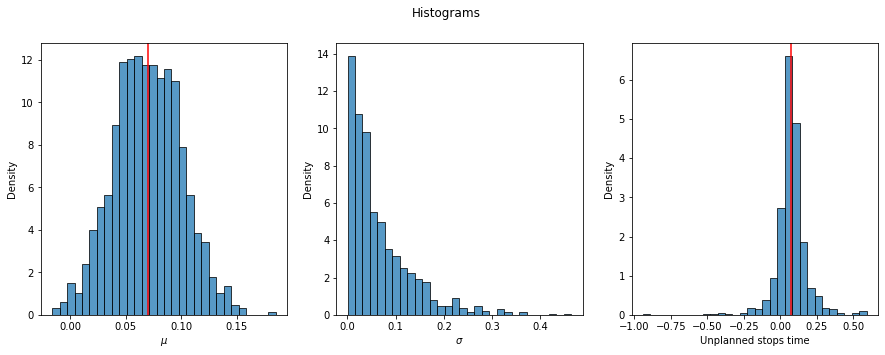

In [4]:
sim_pd = sim.draws_pd()

_, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=sim_pd, x="mu", stat="density", ax=ax[0], bins=30)
sns.histplot(data=sim_pd, x="sig", stat="density", ax=ax[1], bins=30)
sns.histplot(data=sim_pd, x="unplanned_stops_time", stat="density", ax=ax[2], bins=30)
ax[0].axvline(np.mean(sim_pd.mu), color="red")
ax[2].axvline(np.mean(sim_pd.unplanned_stops_time), color="red")
ax[0].set_xlabel("$\mu$")
ax[1].set_xlabel("$\sigma$")
ax[2].set_xlabel("Unplanned stops time")
plt.suptitle("Histograms")
plt.show()

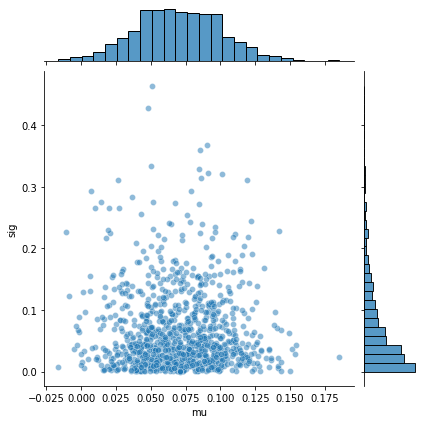

In [5]:
sns.jointplot(data=sim_pd, x="mu", y="sig", alpha=0.5)
plt.show()

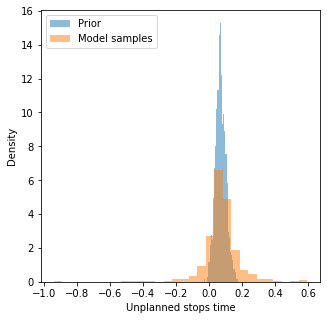

In [6]:
unplanned_stops_time_prior = np.random.normal(mu_mu, mu_sig, size=REFRESH)

plt.figure(figsize=(5, 5))
plt.hist(unplanned_stops_time_prior, bins=30, alpha=0.5, density=True, label="Prior")
plt.hist(sim_pd.unplanned_stops_time, bins=30, alpha=0.5, density=True, label="Model samples")
plt.xlabel("Unplanned stops time"), plt.ylabel("Density")
plt.legend()
plt.show()

**Observed data is possible to obtain using priors.**

## Task 2. Model fit and evaluation

In [7]:
model_1_fit = CmdStanModel(stan_file="unplanned_stops_fit.stan")

INFO:cmdstanpy:found newer exe file, not recompiling


In [2]:
d = {1: (7968.0, 44961.0, 0.1505412911636343), 2: (14384.0, 71881.0, 0.166742015881296), 3: (13531.0, 70913.0, 0.1602363696651035), 4: (4733.0, 80329.0, 0.0556417671815852), 5: (6952.0, 64399.0, 0.09743381312104946), 6: (2202.0, 58017.0, 0.03656653215762467), 7: (13062.0, 69685.0, 0.1578546654259369), 8: (5012.0, 64881.0, 0.0717096132659923), 9: (16624.0, 64370.0, 0.20524977158801885), 10: (10239.0, 69686.0, 0.12810760087582107), 11: (5204.0, 79832.0, 0.0611976104238205), 12: (4097.0, 81941.0, 0.04761849415374602), 13: (13528.0, 64222.0, 0.1739935691318328), 14: (19960.0, 65099.0, 0.23466064731539285), 15: (6200.0, 74064.0, 0.07724509119904316), 16: (19888.0, 65828.0, 0.23202202622614215), 17: (28331.0, 54086.0, 0.34375189584673066), 18: (37628.0, 46757.0, 0.4459086330508977), 19: (590.0, 62994.0, 0.009279063915450428), 20: (4993.0, 66478.0, 0.06986050286130038), 21: (6284.0, 77671.0, 0.07484962182121374), 22: (12181.0, 65560.0, 0.1566869476852626), 23: (13449.0, 64831.0, 0.17180633622892183), 24: (7112.0, 75595.0, 0.08599030311823666), 25: (6737.0, 69267.0, 0.08864007157518025), 26: (1461.0, 56719.0, 0.02511172224132004), 27: (0.0, 43200.0, 0.0), 28: (0.0, 43200.0, 0.0), 29: (0.0, 43200.0, 0.0), 30: (25587.0, 42326.0, 0.37676144478965734), 31: (39779.0, 46340.0, 0.4619073607450156), 32: (43150.0, 43235.0, 0.499508016438039), 33: (27072.0, 59321.0, 0.3133587211926892), 34: (23075.0, 38101.0, 0.3771904014646266), 35: (0.0, 43200.0, 0.0), 36: (0.0, 43200.0, 0.0), 37: (16148.0, 52217.0, 0.23620273531777958), 38: (42910.0, 43211.0, 0.4982524587498984)}

In [49]:
fit = model_1_fit.sample(data={"N": len(d), "unplanned_stops_times": [v[2] for v in d.values()], "mu_mu": mu_mu, "mu_sig": mu_sig, "sig_lbd": sig_lbd}, seed=SEED)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:01 Status



chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


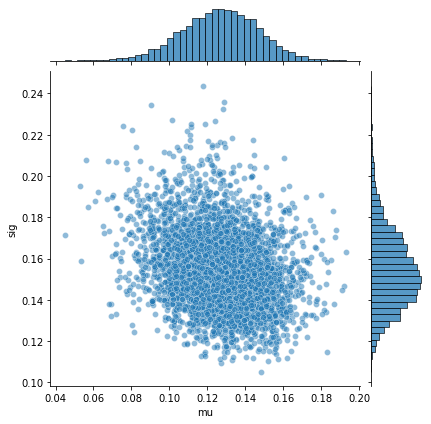

In [50]:
fit_pd = fit.draws_pd()

sns.jointplot(data=fit_pd, x="mu", y="sig", alpha=0.5)
plt.show()

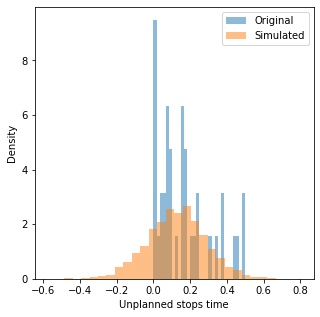

In [51]:
plt.figure(figsize=(5, 5))
plt.hist([v[2] for v in d.values()], bins=30, alpha=0.5, density=True, label="Original")
plt.hist(fit_pd.unplanned_stops_time, bins=30, alpha=0.5, density=True, label="Simulated")
plt.xlabel("Unplanned stops time"), plt.ylabel("Density")
plt.legend()
plt.show()

**The model fits the data pretty well.**

## Task 3. Adding predictor to the model - weight

In [4]:
d_counters = {1: 33976.166, 2: 90821.5, 3: 88954.0, 4: 63257.5, 5: 58983.0, 6: 65500.0, 7: 68684.0, 8: 71998.0, 9: 52207.0, 10: 65215.0, 11: 97578.0, 12: 88997.0, 13: 91188.5, 14: 73650.0, 15: 97675.5, 16: 63757.828, 17: 49584.667, 18: 42497.331000000006, 19: 7736.6669999999995, 20: 32457.0, 21: 58604.0, 22: 59863.5, 23: 85037.0, 24: 95689.5, 25: 54456.0, 26: 15356.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 157475.647, 34: 122475.64000000001, 35: 0.0, 36: 84875.658, 37: 116671.98, 38: 3734.0}
d_counters_array = np.array(list(d_counters.values()))
d_counters_norm = (d_counters_array - d_counters_array.mean()) / d_counters_array.std()
weight_counters = np.linspace(d_counters_norm.min(), d_counters_norm.max(), num=len(d))
weight_counters = np.linspace(0, 0, num=len(d))

d_cycles = {1: 0.9, 2: 0.9, 3: 0.8, 4: 1.2, 5: 1.2, 6: 1.2, 7: 1.0, 8: 1.0, 9: 1.2, 10: 0.8, 11: 0.8, 12: 0.8, 13: 0.8, 14: 0.8, 15: 0.8, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.2, 20: 1.2, 21: 1.2, 22: 0.8, 23: 0.8, 24: 0.8, 25: 1.1, 26: 1.1, 27: 1.1, 28: 1.1, 29: 1.1, 30: 1.1, 31: 1.1, 32: 1.1, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.2, 38: 1.2}
d_cycles_array = np.array(list(d_cycles.values()))
d_cycles_norm = (d_cycles_array - d_cycles_array.mean()) / d_cycles_array.std()
weight_cycles = np.linspace(d_cycles_norm.min(), d_cycles_norm.max(), num=len(d))

mu_mu, mu_sig, sig_lbd = 0.07, 0.03, 15
data_sim = {"N": len(d), "weight_counters": weight_counters, "weight_cycles": weight_cycles, "mu_mu": mu_mu, "mu_sig": mu_sig, "sig_lbd": sig_lbd}
print(data_sim)

{'N': 38, 'weight_counters': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]), 'weight_cycles': array([-1.40286125, -1.33082243, -1.25878361, -1.18674479, -1.11470596,
       -1.04266714, -0.97062832, -0.8985895 , -0.82655068, -0.75451186,
       -0.68247304, -0.61043422, -0.5383954 , -0.46635658, -0.39431776,
       -0.32227894, -0.25024011, -0.17820129, -0.10616247, -0.03412365,
        0.03791517,  0.10995399,  0.18199281,  0.25403163,  0.32607045,
        0.39810927,  0.47014809,  0.54218691,  0.61422574,  0.68626456,
        0.75830338,  0.8303422 ,  0.90238102,  0.97441984,  1.04645866,
        1.11849748,  1.1905363 ,  1.26257512]), 'mu_mu': 0.07, 'mu_sig': 0.03, 'sig_lbd': 15}


## Task 4. Prior predictive checks

In [5]:
model_ppc = CmdStanModel(stan_file="unplanned_stops_linear_ppc.stan")

INFO:cmdstanpy:compiling stan file /home/Project/unplanned_stops_linear_ppc.stan to exe file /home/Project/unplanned_stops_linear_ppc
INFO:cmdstanpy:compiled model executable: /home/Project/unplanned_stops_linear_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Project/unplanned_stops_linear_ppc.hpp /home/Project/unplanned_stops_linear_ppc.stan
Warning in '/home/Project/unplanned_stops_linear_ppc.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/Project/unplanned_stops_linear_ppc.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format fl

In [6]:
sim = model_ppc.sample(data=data_sim, iter_sampling=REFRESH, iter_warmup=0, chains=1, refresh=REFRESH, fixed_param=True, seed=SEED)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


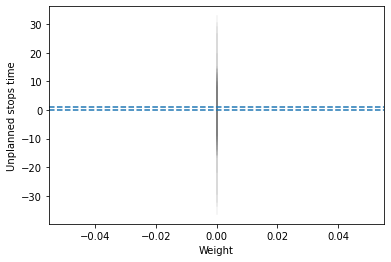

In [7]:
sim_pd = sim.draws_pd()
alpha_samples = sim_pd.alpha.values
beta_samples = sim_pd.beta_.values
gamma_samples = sim_pd.gamma_.values

for i in range(len(alpha_samples)):
    plt.plot(data_sim["weight_counters"], alpha_samples[i] + beta_samples[i] * data_sim["weight_counters"] + gamma_samples[i] * data_sim["weight_cycles"], color="gray", alpha=0.1)

plt.axhline(y=0, ls="--"), plt.axhline(y=1, ls="--")
plt.xlabel("Weight"), plt.ylabel("Unplanned stops time")
plt.show()

**Possible predicted heights are consistent with minum and maximum heights observed in nature.**

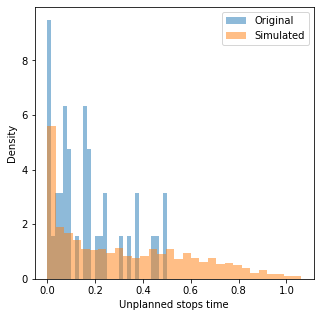

In [8]:
plt.figure(figsize=(5, 5))
plt.hist([v[2] for v in d.values()], bins=30, alpha=0.5, density=True, label="Original")
plt.hist(sim_pd["unplanned_stops_time[1]"], bins=30, alpha=0.5, density=True, label="Simulated")
plt.xlabel("Unplanned stops time"), plt.ylabel("Density")
plt.legend()
plt.show()

## Task 5. Fitting and evaluating model

In [11]:
model_2_fit = CmdStanModel(stan_file="unplanned_stops_linear_fit.stan")

INFO:cmdstanpy:compiling stan file /home/Project/unplanned_stops_linear_fit.stan to exe file /home/Project/unplanned_stops_linear_fit
ERROR:cmdstanpy:Stan program failed to compile:
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Project/unplanned_stops_linear_fit.hpp /home/Project/unplanned_stops_linear_fit.stan
Warning in '/home/Project/unplanned_stops_linear_fit.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/Project/unplanned_stops_linear_fit.stan', line 33, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Semantic error in 

ValueError: Unable to compile Stan model file: /home/Project/unplanned_stops_linear_fit.stan.

In [85]:
data_fit = {"N": len(d), "unplanned_stops_times": [v[2] for v in d.values()], "weight_counters": weight_counters, "weight_cycles": weight_cycles, "mu_mu": mu_mu, "mu_sig": mu_sig, "sig_lbd": sig_lbd}
fit = model_2_fit.sample(data=data_fit, seed=SEED)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)





chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)









chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


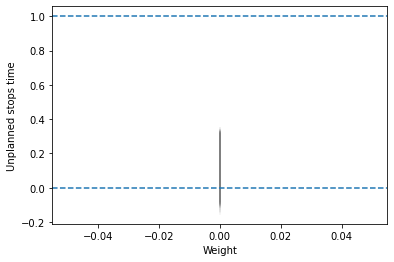

In [86]:
fit_pd = fit.draws_pd()
alpha_samples = fit_pd.alpha.values
beta_samples = fit_pd.beta_.values
gamma_samples = fit_pd.gamma_.values

for i in range(len(alpha_samples)):
    plt.plot(data_fit["weight_counters"], alpha_samples[i] + beta_samples[i] * data_fit["weight_counters"] + gamma_samples[i] * data_fit["weight_cycles"], color="gray", alpha=0.1)

plt.axhline(y=0, ls="--"), plt.axhline(y=1, ls="--")
plt.xlabel("Weight"), plt.ylabel("Unplanned stops time")
plt.show()

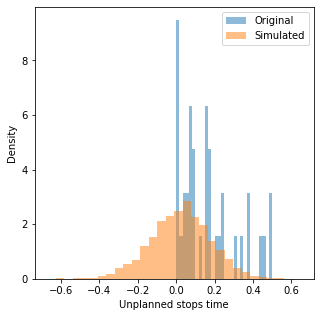

In [87]:
plt.figure(figsize=(5, 5))
plt.hist([v[2] for v in d.values()], bins=30, alpha=0.5, density=True, label="Original")
plt.hist(fit_pd["unplanned_stops_time[1]"], bins=30, alpha=0.5, density=True, label="Simulated")
plt.xlabel("Unplanned stops time"), plt.ylabel("Density")
plt.legend()
plt.show()

**The larger the number of samples $N$, the more narrow the uncertainty area.**

**Observed data is definitely possible within the posterior model. It is more accurate than the prior model - as expected.**

**The larger the number of samples $N$, the more narrow the error area.**